In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset

ds = load_dataset("kdave/Indian_Financial_News")

README.md:   0%|          | 0.00/4.51k [00:00<?, ?B/s]

training_data_26000.csv:   0%|          | 0.00/115M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/26961 [00:00<?, ? examples/s]

In [ ]:
import pandas

df = ds['train'].to_pandas()
df

,URL,Content,Summary,Sentiment
0,https://www.moneycontrol.com/news/business/eco...,US consumer spending dropped by a record in Ap...,consumer spending plunges 13.6 percent in Apri...,Negative
1,https://www.businesstoday.in/top-story/state-r...,State-run lenders require an urgent Rs 1.2 tri...,government will have to take a bulk of the tab...,Negative
2,https://www.financialexpress.com/economy/covid...,Apparel exporters on Wednesday urged the gover...,exporters are facing issues in terms of raw ma...,Negative
3,https://www.moneycontrol.com/news/business/mar...,Asian shares battled to extend a global reboun...,the dollar loses some ground on the safe haven...,Negative
4,https://www.financialexpress.com/industry/six-...,After India’s sovereign credit rating fell to ...,six Indian public-sector undertakings have tak...,Negative
...,...,...,...,...
26956,https://www.financialexpress.com/economy/amit-...,Union Home Minister Amit Shah on Saturday comp...,home minister congratulates prime minister for...,Positive
26957,https://economictimes.indiatimes.com/news/poli...,Saab Bags India’s First 100% FDI in Defence Pr...,first 100% foreign direct investment in defenc...,Positive
26958,https://www.moneycontrol.com/news/business/com...,"Crude oil futures gained to Rs 2,136 per barre...",crude oil futures gain 168.67 percent from low...,Positive
26959,https://economictimes.indiatimes.com/markets/s...,Bloomberg\n\nEmerging markets struggling with ...,"the u.s. economy is powering ahead, adding ove...",Positive


In [ ]:
from transformers import Trainer, TrainingArguments
df2 = df.copy()

In [ ]:
from sklearn.model_selection import train_test_split
df.columns

y = df2['Sentiment']
X = df2.drop(['URL','Summary','Sentiment'], axis=1)

In [ ]:
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Split temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

#Compute metrics for evaluation during training. pred is a object containing predictions and labels, o/p is a dictionary of computed metrics  
def compute_metrics(pred):

    # Extract predictions and labels
    predictions = pred.predictions.argmax(-1)  # Take the index of the highest logit
    labels = pred.label_ids

    # Calculate metrics
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


In [ ]:
import re
from transformers import pipeline, AutoTokenizer
from collections import Counter

def clean_text(text):
    return re.sub(r'\s+', ' ', text).strip()

model_id = "/content/drive/MyDrive/RL_Project/finbert_kdave_trained/finbert_kdave_trained"

finbert = pipeline("sentiment-analysis", model=model_id)
tokenizer = AutoTokenizer.from_pretrained(model_id)



Map:   0%|          | 0/4044 [00:00<?, ? examples/s]

Map:   0%|          | 0/4044 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/4044 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: sudhanva-hb1 (sudhanva-hb1-pes-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


              precision    recall  f1-score   support

    Negative       0.88      0.89      0.89      1301
     Neutral       0.82      0.81      0.81      1365
    Positive       0.88      0.87      0.88      1378

    accuracy                           0.86      4044
   macro avg       0.86      0.86      0.86      4044
weighted avg       0.86      0.86      0.86      4044



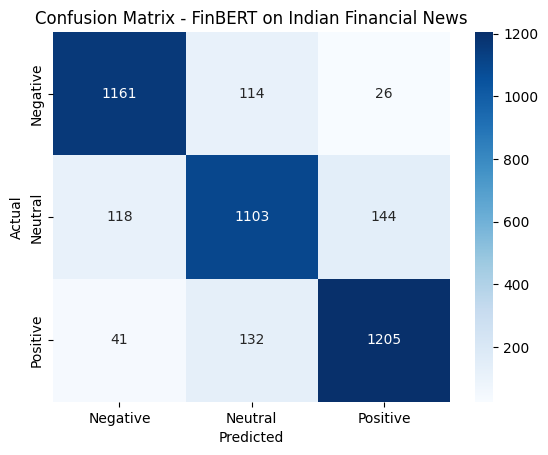

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import re
from transformers import pipeline, AutoTokenizer
from collections import Counter

# saved model
model_id = "/content/drive/MyDrive/finbert_kdave_trained"

# Loading the sentiment analysis pipeline and the tokenizer.
model = AutoModelForSequenceClassification.from_pretrained(model_id)
tokenizer = AutoTokenizer.from_pretrained(model_id)


from datasets import load_dataset, Dataset
import pandas as pd
from sklearn.model_selection import train_test_split


ds = load_dataset("kdave/Indian_Financial_News")
df = ds["train"].to_pandas()
X = df[["Content"]]
y = df["Sentiment"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# label mapping that we use
label_mapping = {"Positive": 2, "Neutral": 1, "Negative": 0}
y_val_mapped = y_val.map(label_mapping)

# Tokenizing and format val dataset
def preprocess_function(examples):
    return tokenizer(examples["Content"], padding="max_length", truncation=True, max_length=512)

val_dataset = Dataset.from_pandas(X_val.assign(labels=y_val))
val_dataset = val_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.remove_columns(["Content"])
val_dataset = val_dataset.map(lambda x: {"labels": label_mapping[x["labels"]]})

from datasets import Value
val_dataset = val_dataset.cast_column("labels", Value("int64"))

# use the trainer for prediction
trainer = Trainer(model = model)
predictions = trainer.predict(val_dataset)

y_true = predictions.label_ids
y_pred = predictions.predictions.argmax(axis=1)

# to print confusion matrix
label_names = ["Negative", "Neutral", "Positive"]

print(classification_report(y_true, y_pred, target_names=label_names))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - FinBERT on Indian Financial News")
plt.show()
